In [ ]:
importimport numpy as np
import pandas as pd
import matplotlib.pyplot as mlt
import seaborn as sns


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
customer_data = pd.read_csv('/content/Final dataset.csv - Hostelsdataset - Hostelsdataset.csv.csv')

In [ ]:
customer_data

,Unnamed: 0,hostel.0me,City,price,Distance,Rating,Purchased,lat,lon
0,1,"""Bike & Bed"" CharinCo Hostel",Osaka,3300,2.9,9.2,1,34.682678,135.513767
1,2,& And Hostel,Fukuoka-City,2600,0.7,9.5,1,0.000000,0.000000
2,3,&And Hostel Akihabara,Tokyo,3600,7.8,8.7,1,35.697447,139.777472
3,4,&And Hostel Ueno,Tokyo,2600,8.7,3.6,0,35.712716,139.783667
4,5,&And Hostel-Asakusa North-,Tokyo,1500,10.5,2.5,0,35.727898,139.798371
...,...,...,...,...,...,...,...,...,...
337,338,YADOYA Guesthouse Green,Tokyo,2300,2.6,8.2,1,35.702908,139.668125
338,339,YADOYA Guesthouse Orange,Tokyo,2000,12.5,3.2,0,35.706513,139.667695
339,340,YAWP! backpackers,Tokyo,2500,17.5,9.3,1,35.752885,139.869197
340,341,You En Me House,Kyoto,2800,2.4,7.2,0,34.997376,135.749063


In [ ]:
customer_data.shape

(342, 9)

In [ ]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  342 non-null    int64  
 1   hostel.0me  342 non-null    object 
 2   City        342 non-null    object 
 3   price       342 non-null    int64  
 4   Distance    342 non-null    float64
 5   Rating      342 non-null    float64
 6   Purchased   342 non-null    int64  
 7   lat         342 non-null    float64
 8   lon         342 non-null    float64
dtypes: float64(4), int64(3), object(2)
memory usage: 24.2+ KB


In [ ]:
customer_data.isnull().sum() #to check null values

Unnamed: 0    0
hostel.0me    0
City          0
price         0
Distance      0
Rating        0
Purchased     0
lat           0
lon           0
dtype: int64

In [ ]:
#used to drop all the rows containing missing values(such as NaN)
data=customer_data.dropna(axis=0)

In [ ]:
customer_data.describe()
#The "describe()" function in pandas generates descriptive statistics that summarize
#the central tendency, dispersion, and shape of a dataset's distribution, excluding NaN (Not a Number) values.

,Unnamed: 0,price,Distance,Rating,Purchased,lat,lon
count,342.000000,3.420000e+02,342.000000,342.000000,342.000000,342.000000,342.000000
mean,171.500000,5.464035e+03,7.685088,6.985965,0.505848,30.476672,119.161988
std,98.871128,5.411650e+04,6.165992,2.746276,0.500698,11.881595,45.955864
min,1.000000,1.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,86.250000,2.000000e+03,2.625000,4.300000,0.000000,34.648377,135.488666
50%,171.500000,2.500000e+03,6.250000,8.400000,1.000000,34.988713,135.750901
75%,256.750000,2.900000e+03,9.975000,9.200000,1.000000,35.692624,139.741850
max,342.000000,1.003200e+06,36.600000,10.000000,1.000000,36.204824,139.877880


<ipython-input-16-ee344ad67446>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat=customer_data.corr()#calculate correaltion between colum and dataframe


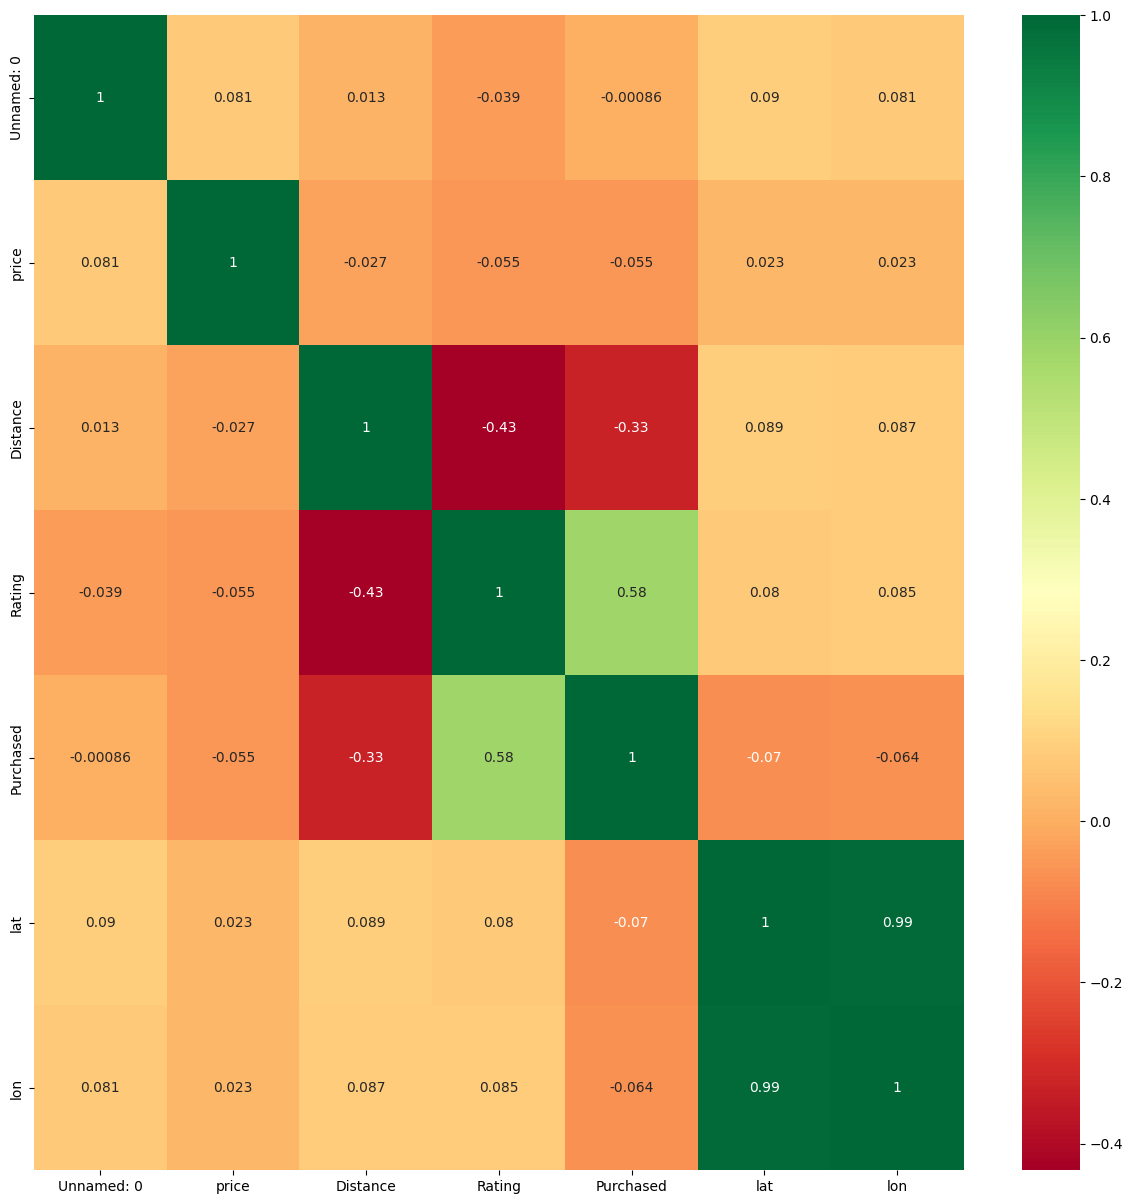

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
corrmat=customer_data.corr()#calculate correaltion between colum and dataframe
top_corr_features=corrmat.index
plt.figure(figsize=(15,15))
#plot heat map
g=sns.heatmap(customer_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")


In [ ]:
import folium
import pandas as pd

# Read the CSV file with GPS coordinates
df = pd.read_csv('/content/Final dataset.csv - Hostelsdataset - Hostelsdataset.csv.csv')

# Create a map object with the center of the map as the first GPS coordinate
map_obj = folium.Map(location=[df['lat'].iloc[0], df['lon'].iloc[0]], zoom_start=12)

# Add a marker for each GPS coordinate to the map object
for index, row in df.iterrows():
    folium.Marker(location=[row['lat'], row['lon']], popup=row['Rating']).add_to(map_obj)

# Display the map object
map_obj

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'Distance'}>],
       [<Axes: title={'center': 'Rating'}>,
        <Axes: title={'center': 'Purchased'}>,
        <Axes: title={'center': 'lat'}>],
       [<Axes: title={'center': 'lon'}>, <Axes: >, <Axes: >]],
      dtype=object)

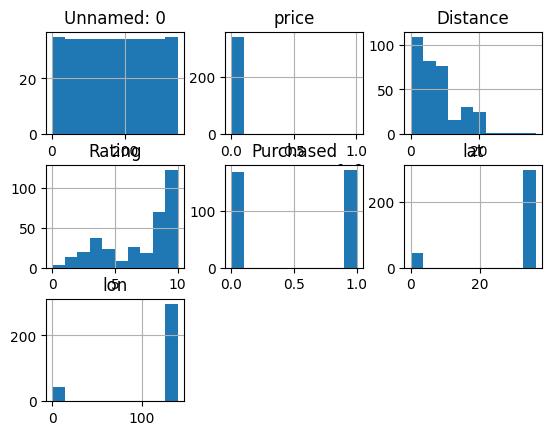

In [ ]:
customer_data.hist()

<Axes: xlabel='Purchased', ylabel='count'>

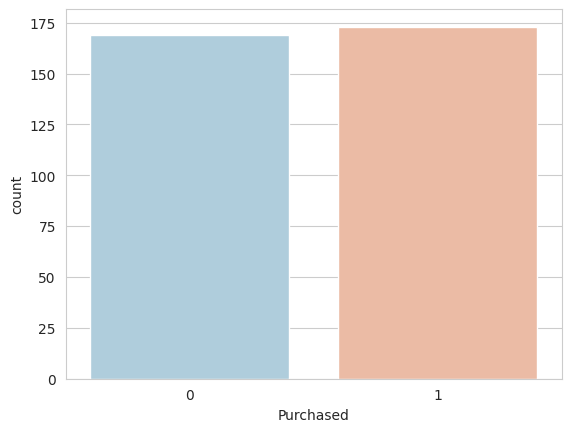

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Purchased',data=customer_data,palette='RdBu_r')

In [ ]:
scatter

# **Logistic Regression Model**



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


X=customer_data.iloc[:,[4,5]].values  #fitting data  input to model
y=customer_data.Purchased  #Output of model

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
printprintprintprinprprintprintprintprintprinpntpprint(X)

[[ 2.9  9.2]
 [ 0.7  9.5]
 [ 7.8  8.7]
 [ 8.7  3.6]
 [10.5  2.5]
 [ 9.4  5.1]
 [16.5  9.3]
 [ 1.6  9.5]
 [10.2  4.1]
 [ 3.   7.7]
 [ 9.7  9.2]
 [10.6  3.6]
 [ 8.  10. ]
 [ 2.2  9.3]
 [ 8.9  9.1]
 [ 9.5  9.1]
 [ 1.9  9. ]
 [10.5  2.1]
 [10.   7.8]
 [ 9.3  1.3]
 [ 9.3  8.7]
 [ 9.9  9.4]
 [ 3.8  8.4]
 [ 4.   8.6]
 [19.2  3.2]
 [ 2.4  9.2]
 [ 9.2  9.2]
 [ 6.5  8.8]
 [ 4.5  4.3]
 [16.1  7.9]
 [ 1.1  6.2]
 [13.2  5.1]
 [36.6  9.6]
 [ 1.1  9.3]
 [ 8.   5.2]
 [ 1.3  5. ]
 [ 9.5  1.5]
 [ 5.9  8.7]
 [ 0.9  6.4]
 [ 9.6  9.1]
 [ 0.3  4.2]
 [ 4.9  8.2]
 [ 9.5  4.1]
 [ 8.8  9.2]
 [ 0.  10. ]
 [ 6.6  1.2]
 [ 4.   8.3]
 [10.9  2.4]
 [ 1.3  9.6]
 [ 7.1  8.6]
 [ 5.   6.9]
 [ 1.1  8.9]
 [ 4.5  9. ]
 [ 7.4  8.9]
 [14.1  9.6]
 [ 8.1  9.4]
 [ 4.7  8.5]
 [ 1.8  8.9]
 [ 0.7  9.6]
 [ 0.8  9.9]
 [ 5.8  8. ]
 [ 4.3  8.7]
 [ 1.4  9.3]
 [ 1.4  8.8]
 [15.8  8.1]
 [13.3  9.3]
 [ 9.7  9.3]
 [ 4.6  3.1]
 [ 1.9  9.3]
 [ 9.8  7.4]
 [ 1.2 10. ]
 [ 2.6  0. ]
 [ 2.5  8.3]
 [ 0.8  9. ]
 [ 5.5  9.3]
 [ 1.5  9.5]
 [18.2  8.9]

In [ ]:
print(y)

0      1
1      1
2      1
3      0
4      0
      ..
337    1
338    0
339    1
340    0
341    1
Name: Purchased, Length: 342, dtype: int64


In [ ]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression(random_state=1) # get instance of model
model1.fit(X_train, y_train) # Train/Fit model

y_pred1 = model1.predict(X_test) # get y predictions
print(classification_report(y_test, y_pred1)) # output accuracy

              precision    recall  f1-score   support

           0       0.88      0.76      0.81        49
           1       0.80      0.91      0.85        54

    accuracy                           0.83       103
   macro avg       0.84      0.83      0.83       103
weighted avg       0.84      0.83      0.83       103



In [ ]:
from sklearn.metrics import confusion_matrix
confmat=confusion_matrix(y_test,y_pred1)
print(confmat)

[[37 12]
 [ 5 49]]


In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred1))

0.8349514563106796


In [ ]:
#Importing KNN Classifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train) #Fitting model on entire dataset X
y_pred2 = knn.predict(X_test) # Predicting
#For K = 1
print(accuracy_score(y_test, y_pred2))

0.7766990291262136


In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred3 = knn.predict(X_test)
#For k=5
print(accuracy_score(y_test, y_pred3))

0.7572815533980582


In [ ]:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',metric_params=None, n_jobs=None, n_neighbors=5, p=2,weights='uniform')
# try K=1 through K=30 and record testing accuracy
k_range = list(range(1, 31))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred4 = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred4))

Text(0, 0.5, 'Testing Accuracy')

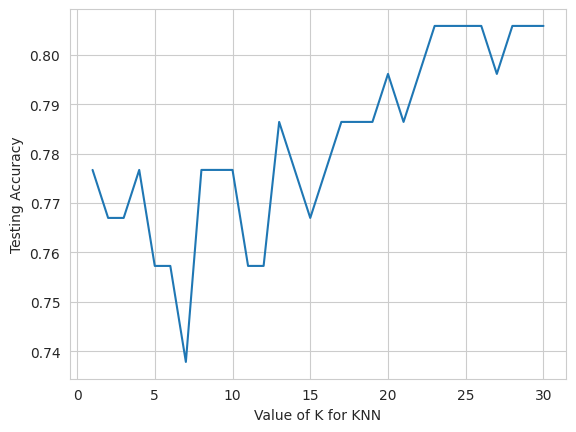

In [ ]:
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt
# allow plots to appear within the notebook
%matplotlib inline
# plot the relationship between K and testing aaccuracyccuracy
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [ ]:
knn = KNeighborsClassifier(n_neighbors=23)
knn.fit(X_train, y_train)
y_pred5 = knn.predict(X_test)
print(accuracy_score(y_test, y_pred5))  #final accuracy of KNN

0.8058252427184466


In [ ]:
#Decision tree

In [ ]:
from sklearn.metrics import classification_report   #decision
from sklearn.tree import DecisionTreeClassifier

model2 = DecisionTreeClassifier(random_state=1) # get instance of model
model2.fit(X_train, y_train) # Train/Fit model

y_pred6 = model2.predict(X_test) # get y predictions
print(classification_report(y_test, y_pred6)) # output accuracy

              precision    recall  f1-score   support

           0       0.74      0.65      0.70        49
           1       0.72      0.80      0.75        54

    accuracy                           0.73       103
   macro avg       0.73      0.72      0.73       103
weighted avg       0.73      0.73      0.73       103



In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred6))   #accuracy 1

0.7281553398058253


In [ ]:
confmat=confusion_matrix(y_test,y_pred6)
print(confmat)

[[32 17]
 [11 43]]


In [ ]:
mymodel3=DecisionTreeClassifier(criterion="entropy", max_depth=5)
mymodel3.fit(X_train,y_train)
y_pred7=mymodel3.predict(X_test)
print(classification_report(y_test, y_pred7)) # output accuracy

              precision    recall  f1-score   support

           0       0.83      0.71      0.77        49
           1       0.77      0.87      0.82        54

    accuracy                           0.80       103
   macro avg       0.80      0.79      0.79       103
weighted avg       0.80      0.80      0.79       103



In [ ]:
print(accuracy_score(y_test,y_pred7))    #acuuracy 2

0.7961165048543689


In [ ]:
confmat=confusion_matrix(y_test,y_pred7)
print(confmat)

[[35 14]
 [ 7 47]]


In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier()
classifier=classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

In [ ]:
#visualize tree
from sklearn.tree import export_graphviz
!pip install six

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

feature_cols=['Distance','Rating']

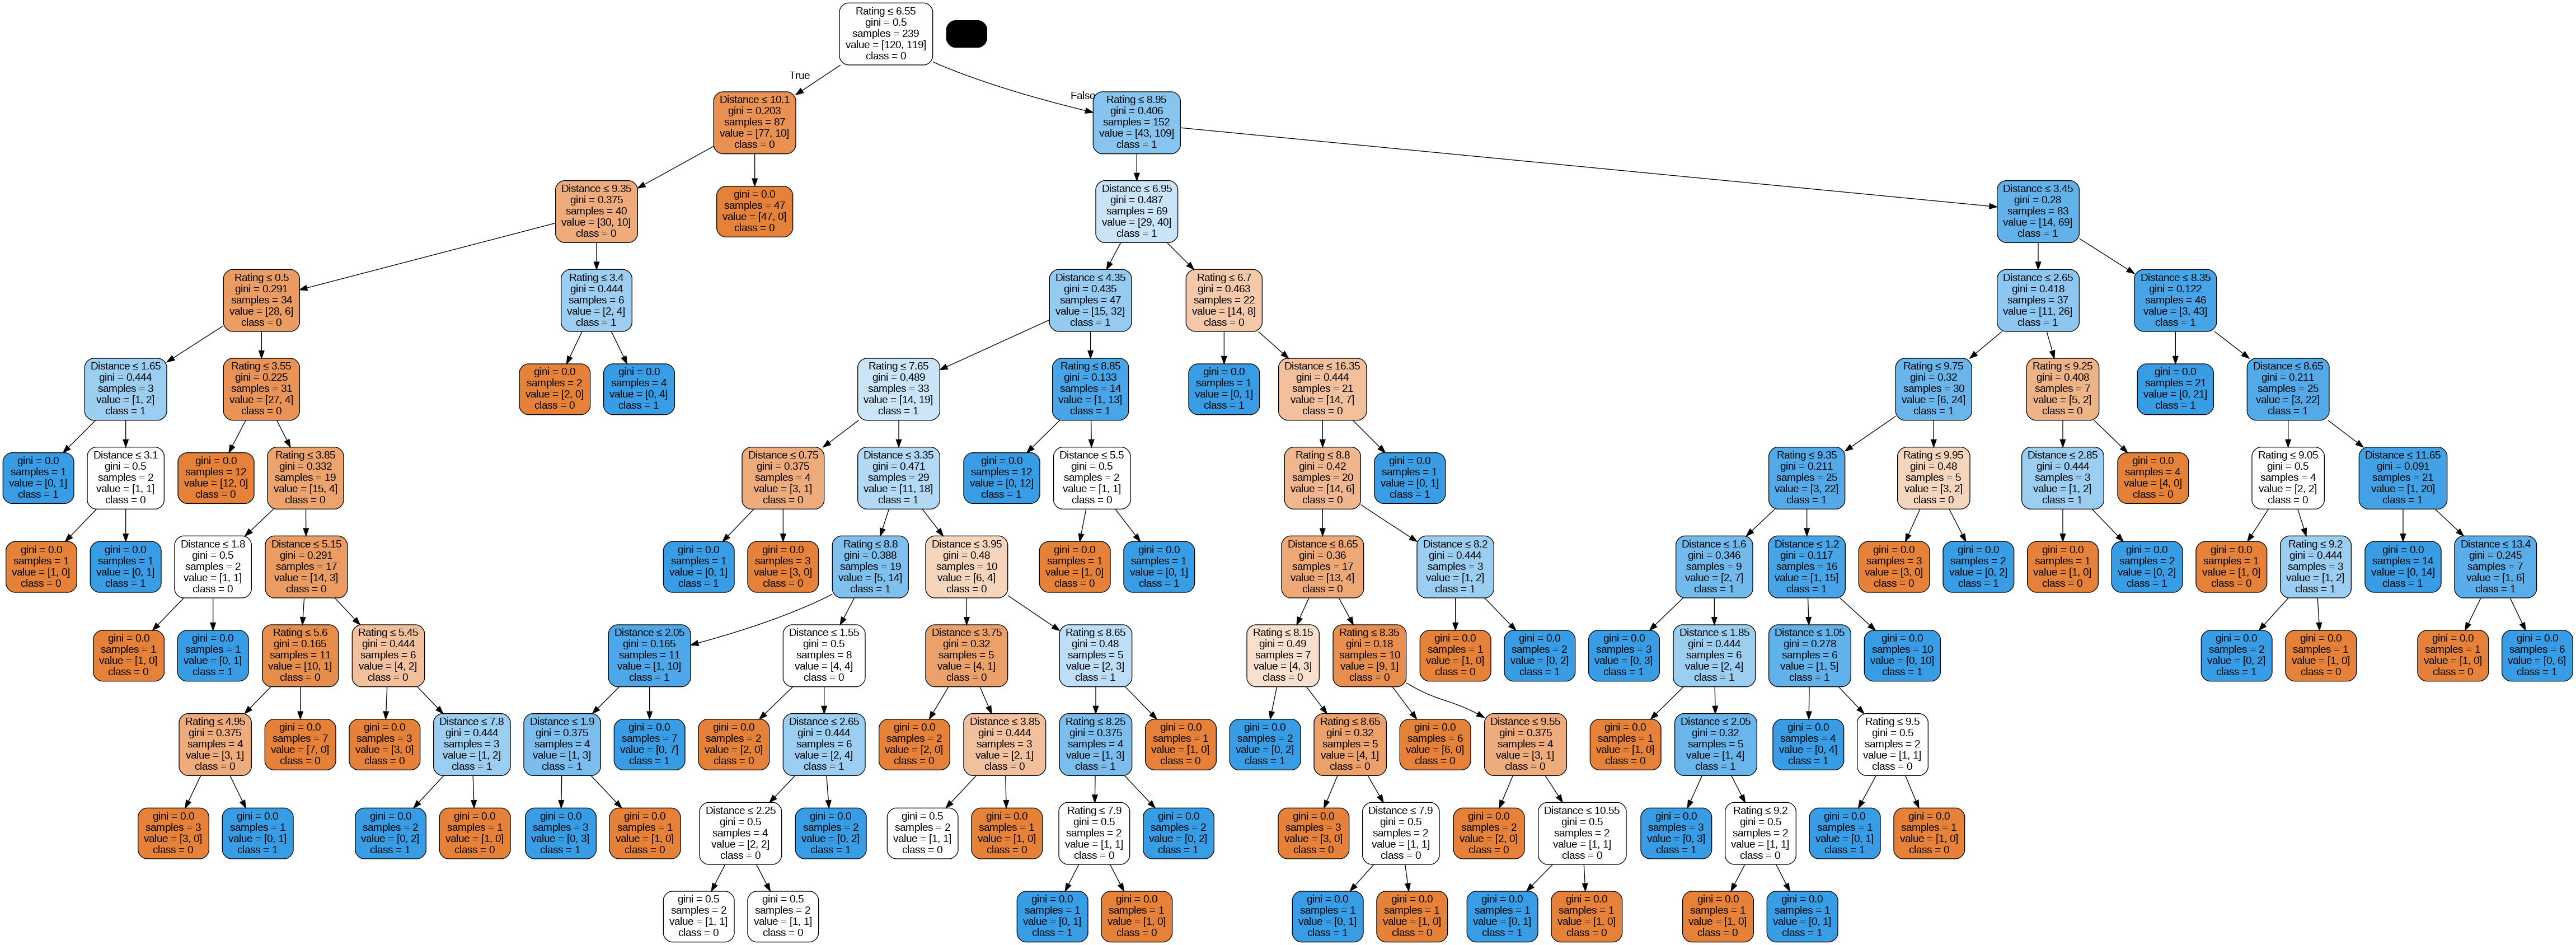

In [ ]:

from six import StringIO
from IPython.display import Image
import pydotplus
data=StringIO()
export_graphviz(classifier,out_file=data,
                filled=True,rounded=True,
                special_characters=True,feature_names=feature_cols,class_names=['0','1'])
graph=pydotplus.graph_from_dot_data(data.getvalue())
Image(graph.create_png())

In [ ]:
dtree = DecisionTreeClassifier(criterion='gini')
dtree.fit(X_train, y_train)
pred = dtree.predict(X_test)
print('Criterion=gini', accuracy_score(y_test, pred))
dtree = DecisionTreeClassifier(criterion='entropy')
dtree.fit(X_train, y_train)
pred = dtree.predict(X_test)
print('Criterion=entropy', accuracy_score(y_test, pred))

Criterion=gini 0.7378640776699029
Criterion=entropy 0.7378640776699029
